# Bundesliga Player Analysis

## Import Necessary Libraries and Load the Dataset

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")
plt.style.use("dark_background")

df = pd.read_csv(r"C:\Users\Stefan\Documents\Python\Projects\Bundesliga Player Analysis\Data\bundesliga_player.csv")
pd.set_option('display.max_rows', 500)
    

## Data cleaning

In [2]:
#Removing unnecessary columns
df = df[['name', 'age', 'height', 'nationality',
       'place_of_birth', 'price','position','foot',
       'club', 'contract_expires', 'joined_club', 'player_agent', 'outfitter']]

#Handling null values
df['outfitter'] = df['outfitter'].fillna('None')
df['player_agent'] = df['player_agent'].fillna('None')


df['first_nationality'] = df['nationality'].str.split().str[0]
df['Player position'] = df['position'].str.split('-').str[0]
df['Player position'] = df['Player position'].str.capitalize()
    

## Player Age Distribution

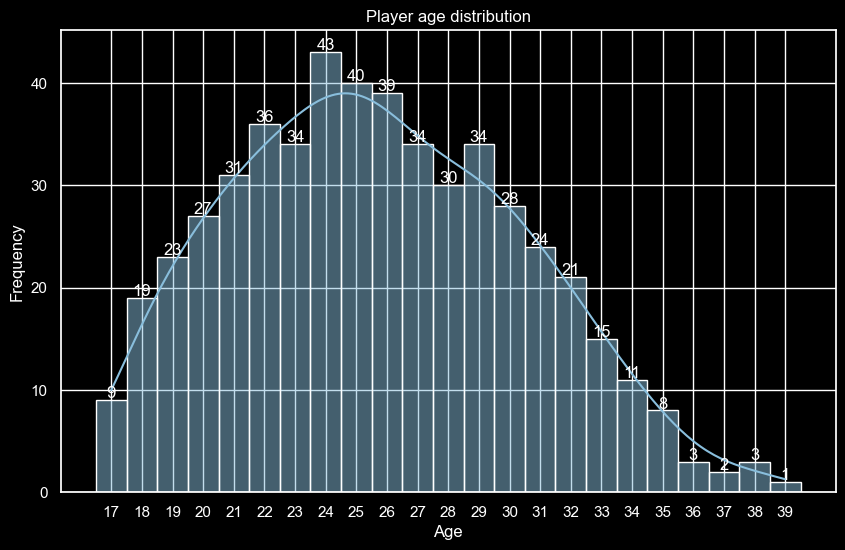

In [3]:

plt.figure(figsize=(10,6))
histplot = sns.histplot(data=df, x='age', kde=True, discrete=True, color=sns.color_palette("Blues_r")[3])
plt.title('Player age distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

for rect in histplot.patches:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, 
             height + 0.2, 
             int(height), 
             ha='center')

plt.xticks(range(df['age'].min(), df['age'].max()+1))

plt.show()
    

## Club Values

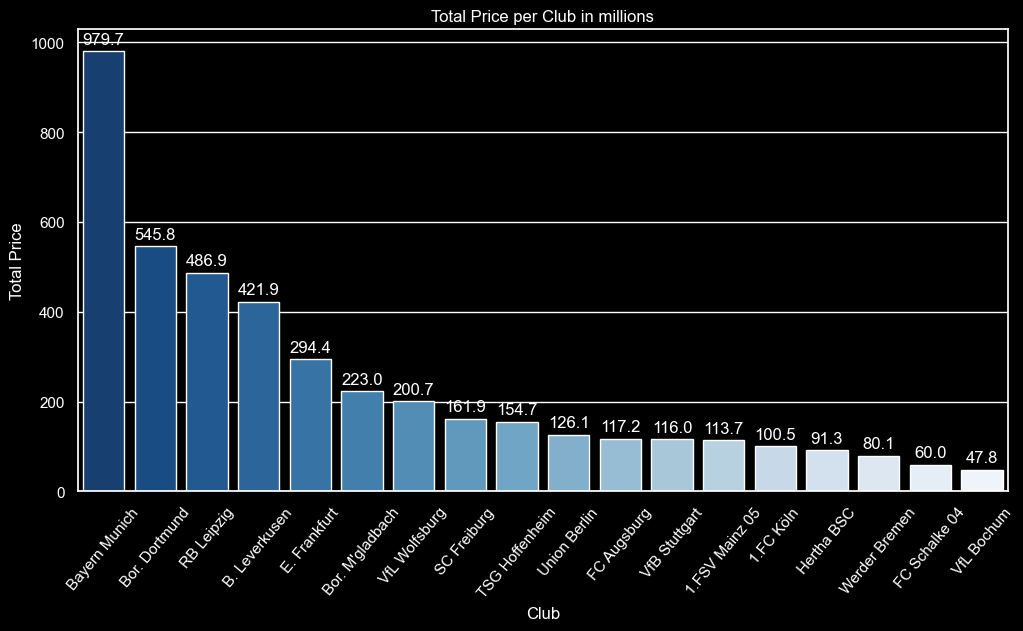

In [4]:

club_value = df.groupby('club')['price'].sum().reset_index()

club_value = club_value.sort_values('price', ascending=False)
club_value = club_value[club_value['price'] >= 2]

plt.figure(figsize=(12,6))
barplot = sns.barplot(data=club_value, x='club', y='price', palette="Blues_r")
plt.title('Total Price per Club in millions')
plt.xlabel('Club')
plt.ylabel('Total Price')
plt.xticks(rotation=50)

for bar in barplot.patches:
    barplot.text(x = bar.get_x() + bar.get_width() / 2, 
                 y = bar.get_height()+ 10,
                 s = f'{bar.get_height():.1f}', 
                 ha = 'center', 
                 va = 'bottom')
    
plt.show()
    

## Player Foot Preference

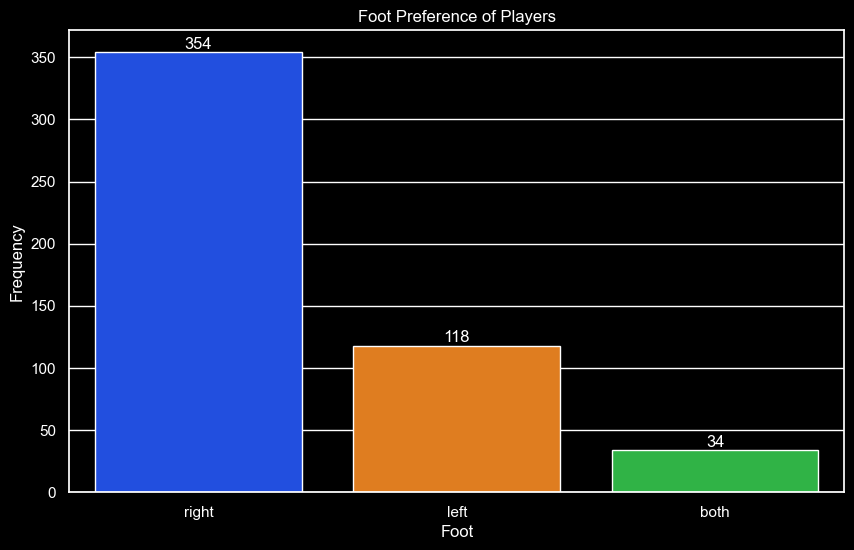

In [5]:

plt.figure(figsize=(10,6))
barplot = sns.countplot(data=df, x='foot', palette="bright")
plt.title('Foot Preference of Players')
plt.xlabel('Foot')
plt.ylabel('Frequency')

for bar in barplot.patches:
    barplot.text(x = bar.get_x() + bar.get_width() / 2, 
                 y= bar.get_height() + 0.2,
                 s = f'{int(bar.get_height())}', 
                 ha = 'center', 
                 va = 'bottom')

plt.show()
    

## Average Player Height per Position

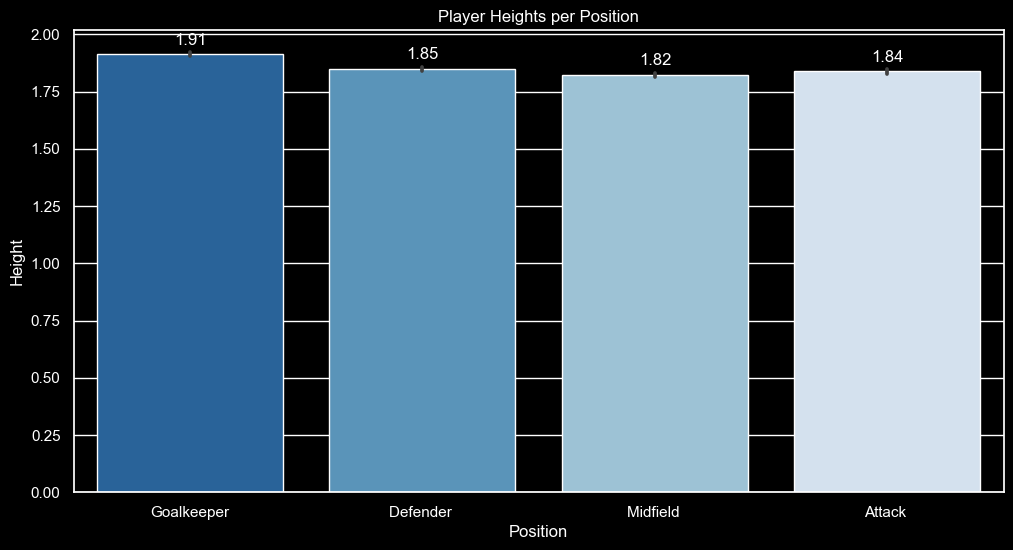

In [6]:

plt.figure(figsize=(12,6))
barplot = sns.barplot(data=df, x='Player position', y='height', palette="Blues_r")
plt.title('Player Heights per Position')
plt.xlabel('Position')
plt.ylabel('Height')

for bar in barplot.patches:
    barplot.text(x = bar.get_x() + bar.get_width() / 2, 
                 y = bar.get_height()+ 0.03,
                 s = f'{bar.get_height():.2f}',
                 ha = 'center', 
                 va = 'bottom')
plt.show()
    

## Distribution of Player Nationalities

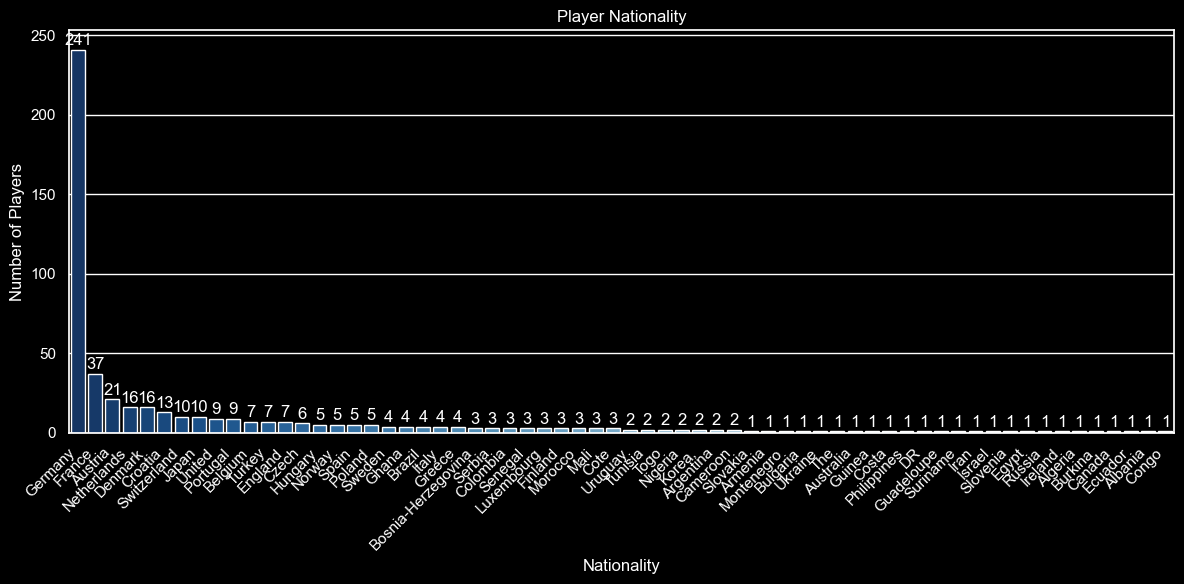

In [7]:

df_counts = df['first_nationality'].value_counts()

df_sorted = df_counts.sort_values(ascending=False)
plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=df_counts.index, y=df_counts.values, palette="Blues_r")
plt.title('Player Nationality')
plt.xlabel('Nationality')
plt.ylabel('Number of Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

for bar, count in zip(barplot.patches, df_counts.values):
    barplot.text(x=bar.get_x() + bar.get_width() / 2,
                 y=bar.get_height() + 1,
                 s=f'{count}',
                 ha='center',
                 va='bottom')

plt.show()
    